<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/nominals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


## Load data

In [5]:
df = pd.read_csv('/social-media.csv',
                 index_col=0,
                 usecols=['id', 'gender', 'pref_service'])

# Set correct data types.
df['gender'] = df['gender'].astype('category')
df['pref_service'] = df['pref_service'].astype('category')
df.sample(10).sort_values('id')

,gender,pref_service
id,,
4,female,Facebook
7,female,Facebook
10,female,Facebook
19,female,Instagram
34,female,Twitter
49,male,Facebook
57,male,Facebook
58,male,Instagram
59,male,Instagram


## Basic crosstab

In [6]:
pd.crosstab(df['pref_service'], df['gender'])

gender,female,male,nonbinary,prefer not to say
pref_service,,,,
Facebook,11,13,0,0
Instagram,15,11,0,0
Mastodon,6,3,1,0
Other,3,4,1,0
Twitter,10,17,0,1


## Basic crosstab with margins

In [7]:
pd.crosstab(df['pref_service'], df['gender'], margins=True)

gender,female,male,nonbinary,prefer not to say,All
pref_service,,,,,
Facebook,11,13,0,0,24
Instagram,15,11,0,0,26
Mastodon,6,3,1,0,10
Other,3,4,1,0,8
Twitter,10,17,0,1,28
All,45,48,2,1,96


## Grouped bar chart

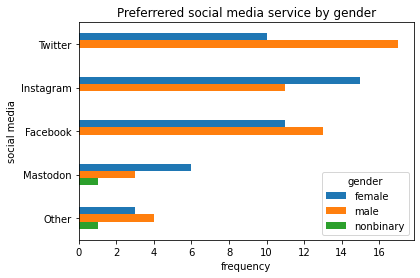

In [8]:
# Remove all 'prefer not to say' responses.
df = df.loc[df['gender'] != 'prefer not to say']
# Generate cross tabulation.
table = pd.crosstab(df['pref_service'], df['gender'], margins=True)
# Remove the All row, we don’t need it.
table.drop('All', axis='rows', inplace=True)
# Sort by the All column.
table = table.sort_values(by='All', ascending=False)
# Remove the All column before plotting.
table.drop('All', axis='columns', inplace=True)

ax = table.plot.barh()
ax.invert_yaxis()
ax.set_title('Preferrered social media service by gender')
ax.set_xlabel('frequency')
ax.set_ylabel('social media')
plt.show()

## Stacked bar chart

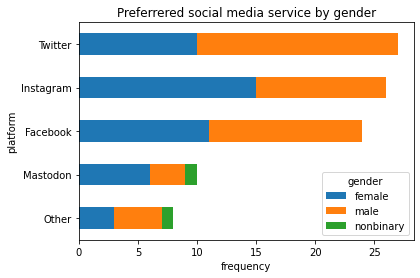

In [9]:
# Remove all 'prefer not to say' responses.
df = df.loc[df['gender'] != 'prefer not to say']
# Generate cross tabulation.
table = pd.crosstab(df['pref_service'], df['gender'], margins=True)
# Remove the All row, we don’t need it.
table.drop('All', axis='rows', inplace=True)
# Sort by the All column.
table = table.sort_values(by='All', ascending=False)
# Remove the All column before plotting.
table.drop('All', axis='columns', inplace=True)

ax = table.plot.barh(stacked=True)
ax.invert_yaxis()
ax.set_title('Preferrered social media service by gender')
ax.set_xlabel('frequency')
ax.set_ylabel('platform')
plt.show()

## Normalised stack bar chart

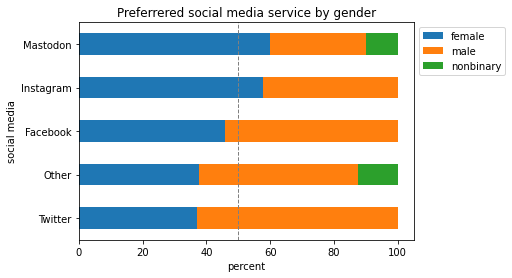

In [35]:
# Remove all 'prefer not to say' responses.
df = df.loc[df['gender'] != 'prefer not to say']
# Generate normalised cross tabulation.
table = pd.crosstab(df['pref_service'], df['gender'], normalize='index')
# Sort by female responses and convert to percentage.
table = table.sort_values(by='female', ascending=False) * 100

ax = table.plot.barh(stacked=True)
ax.invert_yaxis()
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1)
ax.set_title('Preferrered social media service by gender')
ax.set_xlabel('percent')
ax.set_ylabel('social media')
# Place legent outside plot axes.
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## Heat map

In [36]:
# Remove all 'prefer not to say' responses.
df = df.loc[df['gender'] != 'prefer not to say']
# Generate normalised cross tabulation.
table = pd.crosstab(df['pref_service'], df['gender'])
# Sort by female responses.
table = table.sort_values(by='female', ascending=False)



In [43]:
table1 = np.array(table)
table1

array([[15, 11,  0],
       [11, 13,  0],
       [10, 17,  0],
       [ 6,  3,  1],
       [ 3,  4,  1]])

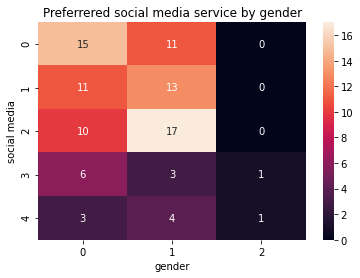

In [45]:
ax = sns.heatmap(table1, annot=True)
ax.set_title('Preferrered social media service by gender')
ax.set_xlabel('gender')
ax.set_ylabel('social media')
plt.show()